In [3]:
import pandas as pd
import numpy as np
import ast

titles = pd.read_csv("titles.csv")
credits = pd.read_csv("credits.csv")

### Examining Data

In [4]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [5]:
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [6]:
titles.shape

(5850, 15)

In [7]:
credits.shape

(77801, 5)

In [8]:
titles.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [9]:
credits.isnull().sum()

person_id       0
id              0
name            0
character    9772
role            0
dtype: int64

In [10]:
titles_clean = titles.drop_duplicates(subset="id")
credits_clean = credits.drop_duplicates()

### Pre-Processing

In [11]:
titles_clean = titles_clean.dropna(subset=["title"])

In [12]:
titles_clean["description"] = titles_clean["description"].fillna("No description available.")
titles_clean["age_certification"] = titles_clean["age_certification"].fillna("Unknown")
titles_clean["seasons"] = titles_clean["seasons"].fillna(0)

In [13]:
num_cols = ["imdb_score","imdb_votes","tmdb_popularity","tmdb_score"]
for col in num_cols:
    titles_clean[col] = titles_clean[col].fillna(0)

In [14]:
credits_clean["character"] = credits_clean["character"].fillna("Unknown")

In [15]:
def fix_genres(g):
    if pd.isna(g):
        return []
    try:
        return ast.literal_eval(g)
    except:
        return []

titles_clean["genres"] = titles_clean["genres"].apply(fix_genres)

In [16]:
titles_clean["genre_string"] = titles_clean["genres"].apply(lambda lst: " ".join(lst))

In [17]:
def fix_countries(c):
    if pd.isna(c):
        return []
    try:
        return ast.literal_eval(c)
    except:
        return []

titles_clean["production_countries"] = titles_clean["production_countries"].apply(fix_countries)

In [18]:
titles_clean["release_year"] = pd.to_numeric(titles_clean["release_year"])
titles_clean["runtime"] = pd.to_numeric(titles_clean["runtime"])

In [19]:
titles_clean["age_certification"] = titles_clean["age_certification"].astype(str).str.strip().str.upper()

In [20]:
titles_clean["imdb_score"] = pd.to_numeric(titles_clean["imdb_score"])
titles_clean["imdb_votes"] = pd.to_numeric(titles_clean["imdb_votes"])
titles_clean["tmdb_popularity"] = pd.to_numeric(titles_clean["tmdb_popularity"])
titles_clean["tmdb_score"] = pd.to_numeric(titles_clean["tmdb_score"])

In [21]:
titles_clean["type"] = titles_clean["type"].astype("category")


In [22]:
credits_clean["person_id"] = credits_clean["person_id"].astype(str)
credits_clean["id"] = credits_clean["id"].astype(str)

In [23]:
credits_clean["role"] = credits_clean["role"].str.strip().str.lower()
credits_clean["character"] = credits_clean["character"].astype(str).str.strip()

### Cleaned data look

In [24]:
titles_clean.shape

(5849, 16)

In [25]:

credits_clean.shape

(77801, 5)

In [26]:
titles_clean.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre_string
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,[documentation],[US],1.0,NaN,0.0,0.0,0.600,0.000,documentation
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"[drama, crime]",[US],0.0,tt0075314,8.2,808582.0,40.965,8.179,drama crime
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"[drama, action, thriller, european]",[US],0.0,tt0068473,7.7,107673.0,10.010,7.300,drama action thriller european
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"[fantasy, action, comedy]",[GB],0.0,tt0071853,8.2,534486.0,15.461,7.811,fantasy action comedy
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,UNKNOWN,150,"[war, action]","[GB, US]",0.0,tt0061578,7.7,72662.0,20.398,7.600,war action


In [27]:
credits_clean.head()


,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,actor
1,14658,tm84618,Jodie Foster,Iris Steensma,actor
2,7064,tm84618,Albert Brooks,Tom,actor
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,actor
4,48933,tm84618,Cybill Shepherd,Betsy,actor


In [28]:

titles_clean.to_csv("titles_cleaned.csv", index=False)
credits_clean.to_csv("credits_cleaned.csv", index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pretty plots
sns.set(style="whitegrid")


### Distribution of Content Type (Movies vs TV Shows)

/var/folders/tk/w254k10x093_d73zr7vj91q80000gn/T/ipykernel_1974/1172538967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titles, x="type", palette="pastel")


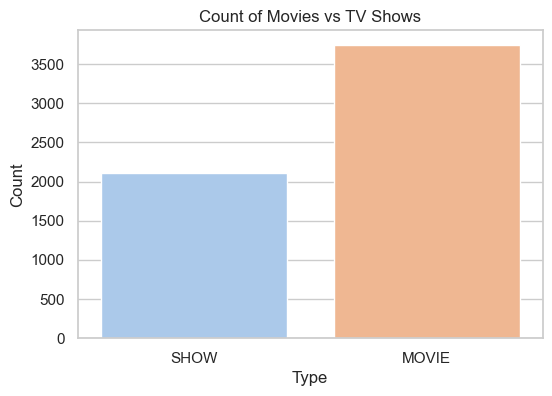

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(data=titles, x="type", palette="pastel")
plt.title("Count of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

### Runtime Distribution

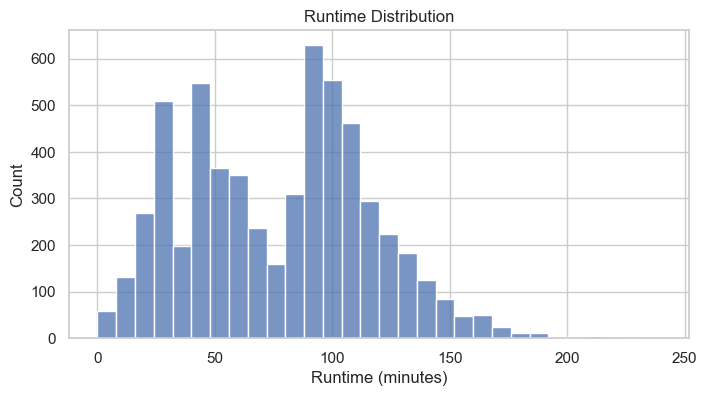

In [37]:
plt.figure(figsize=(8,4))
sns.histplot(titles["runtime"], bins=30, kde=False)
plt.title("Runtime Distribution")
plt.xlabel("Runtime (minutes)")
plt.show()

### Top Production Countries

/var/folders/tk/w254k10x093_d73zr7vj91q80000gn/T/ipykernel_1974/4032409758.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")


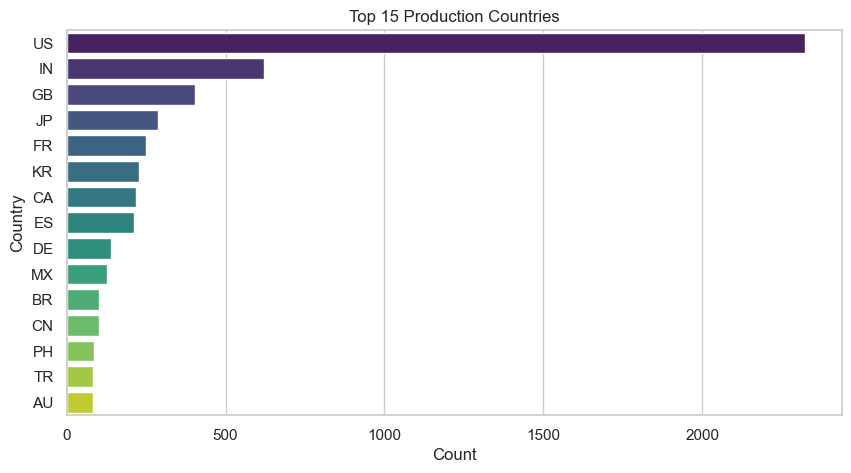

In [40]:
country_counts = titles["production_countries"].apply(lambda x: eval(x) if isinstance(x, str) else []).explode().value_counts().head(15)

plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")
plt.title("Top 15 Production Countries")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

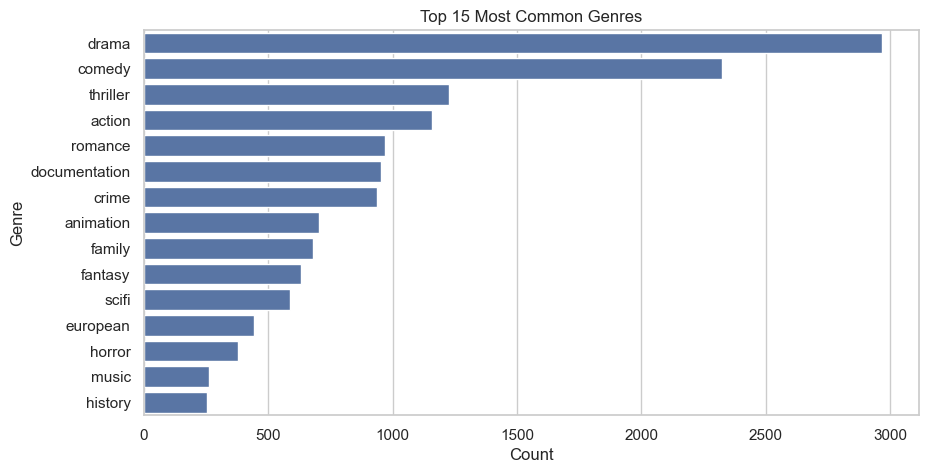

In [50]:
# explode genres for counting
genre_counts = titles["genre_string"].str.split(", ").explode().value_counts().head(15)

plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Top 15 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()